# Import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load Data

In [4]:
train_data = pd.read_csv('../data/tree_train.csv')
valid_data = pd.read_csv('../data/tree_valid.csv')
train_data = pd.concat([train_data,valid_data])

In [3]:
train_data.head()

,Unnamed: 0,spacegroup,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1462,206,0.1875,0.2500,0.5625,9.8238,9.8237,9.8238,90.0019,90.0020,89.9976,0.1833,1.3345
1,19,12,0.2500,0.2500,0.5000,12.2649,3.1889,6.3388,90.0000,105.0943,90.0001,0.2063,1.5596
2,970,206,0.6250,0.3750,0.0000,9.1418,9.1413,9.1413,90.0039,90.0043,89.9967,0.1051,3.6341
3,214,194,0.6875,0.3125,0.0000,6.1650,6.1648,23.5817,90.0177,89.9981,120.0032,0.2311,3.1668
4,2217,33,0.9062,0.0312,0.0625,9.8901,8.4916,9.1232,90.0055,90.0023,90.0012,0.1067,4.0881


# Data Statistics

In [4]:
unique_values_distribution = []
def unique_col_values(df):
    for column in df:
        unique_values_distribution.append ((df[column].name, len(df[column].unique()), df[column].dtype ))
        
unique_col_values(train_data)

columns_heading  = ['Header Name','Unique Count','Data Type']

data_distribution = pd.DataFrame.from_records(unique_values_distribution, columns=columns_heading)

In [5]:
data_distribution

,Header Name,Unique Count,Data Type
0,Unnamed: 0,1920,int64
1,spacegroup,6,int64
2,percent_atom_al,42,float64
3,percent_atom_ga,42,float64
4,percent_atom_in,42,float64
5,lattice_vector_1_ang,1131,float64
6,lattice_vector_2_ang,1080,float64
7,lattice_vector_3_ang,1070,float64
8,lattice_angle_alpha_degree,422,float64
9,lattice_angle_beta_degree,509,float64


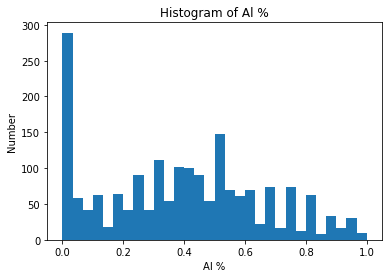

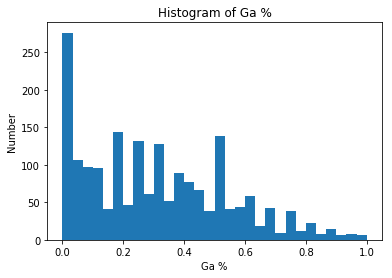

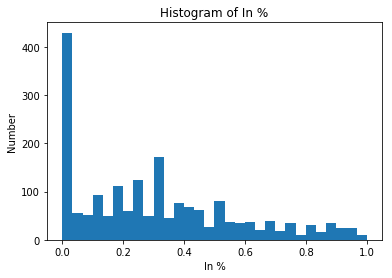

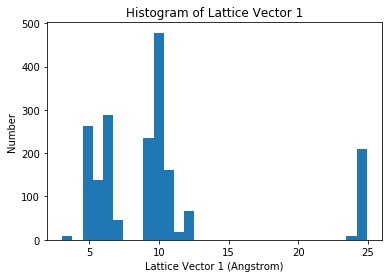

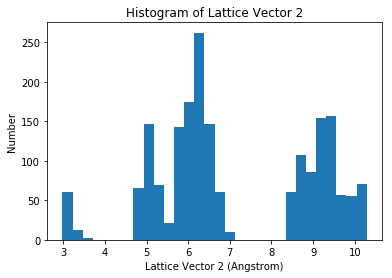

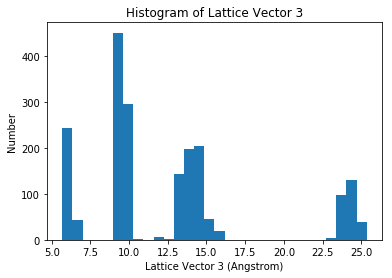

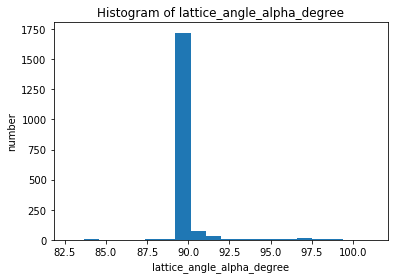

In [6]:
space_groups_data = np.array(train_data['percent_atom_al'])
plt.hist(space_groups_data,bins=30)
plt.title("Histogram of Al %")
plt.xlabel("Al %")
plt.ylabel("Number")
plt.show()

space_groups_data = np.array(train_data['percent_atom_ga'])
plt.hist(space_groups_data,bins=30)
plt.title("Histogram of Ga %")
plt.xlabel("Ga %")
plt.ylabel("Number")
plt.show()

space_groups_data = np.array(train_data['percent_atom_in'])
plt.hist(space_groups_data,bins=30)
plt.title("Histogram of In %")
plt.xlabel("In %")
plt.ylabel("Number")
plt.show()

space_groups_data = np.array(train_data['lattice_vector_1_ang'])
plt.hist(space_groups_data,bins=30)
plt.title("Histogram of Lattice Vector 1")
plt.xlabel("Lattice Vector 1 (Angstrom)")
plt.ylabel("Number")
plt.show()

space_groups_data = np.array(train_data['lattice_vector_2_ang'])
plt.hist(space_groups_data,bins=30)
plt.title("Histogram of Lattice Vector 2")
plt.xlabel("Lattice Vector 2 (Angstrom)")
plt.ylabel("Number")
plt.show()

space_groups_data = np.array(train_data['lattice_vector_3_ang'])
plt.hist(space_groups_data,bins=30)
plt.title("Histogram of Lattice Vector 3")
plt.xlabel("Lattice Vector 3 (Angstrom)")
plt.ylabel("Number")
plt.show()

space_groups_data = np.array(train_data['lattice_angle_alpha_degree'])
plt.title("Histogram of lattice_angle_alpha_degree")
plt.xlabel("lattice_angle_alpha_degree")
plt.ylabel("number")
plt.hist(space_groups_data,bins=20)
plt.show()

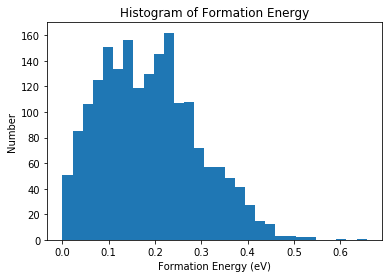

In [7]:
formation_energy_data = np.array(train_data['formation_energy_ev_natom'])
plt.hist(formation_energy_data,bins=30)
plt.title("Histogram of Formation Energy")
plt.xlabel("Formation Energy (eV)")
plt.ylabel("Number")
plt.show()

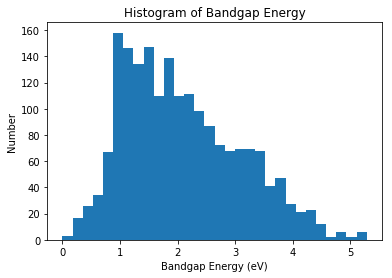

In [8]:
bandgap_energy_data = np.array(train_data['bandgap_energy_ev'])
plt.title("Histogram of Bandgap Energy")
plt.xlabel("Bandgap Energy (eV)")
plt.ylabel("Number")
plt.hist(bandgap_energy_data,bins=30)
plt.show()

# Extract Useful Data

In [11]:
X_train = train_data.drop(["Unnamed: 0","formation_energy_ev_natom","bandgap_energy_ev"],axis=1)
Y_formation = train_data["formation_energy_ev_natom"]
Y_bandgap = train_data["bandgap_energy_ev"]

# Split for Different Tasks

In [12]:
formation_X_train, formation_X_test, formation_Y_train, formation_Y_test = train_test_split(X_train,Y_formation,test_size=0.25,random_state=23)
bandgap_X_train, bandgap_X_test, bandgap_Y_train, bandgap_Y_test = train_test_split(X_train,Y_bandgap,test_size=0.25,random_state=23)

# Set up Model

In [13]:
import time
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, RANSACRegressor
from xgboost.sklearn import XGBRegressor

In [14]:
adb = AdaBoostRegressor()
gbt = GradientBoostingRegressor()
xgb = XGBRegressor()

models = {'ABR':adb,
         'ABR_auto':adb,
         'GBT': gbt,
         'GBT_auto': gbt,
         'XGB': xgb,
         'XGB_auto': xgb}

configure parameters

In [15]:
def hyper_parameters(name):
    if name=='ABR':
        params = {
            'adaboostregressor__n_estimators': [160,170,180,190,200],
            'adaboostregressor__loss': ['exponential'],
            'adaboostregressor__learning_rate': [0.1]
        }
    elif name=='ABR_auto':
        params = {}
    elif name=='GBT':
        params = {
            'gradientboostingregressor__n_estimators': [90],
            'gradientboostingregressor__learning_rate': [0.1],
            'gradientboostingregressor__max_depth': [3,7]
        }
    elif name=='GBT_auto':
        params = {}
    elif name=='XGB':
        params = {
            'xgbregressor__max_depth': [13],
            'xgbregressor__learning_rate': [0.1],
            'xgbregressor__n_estimators': [80],
            'xgbregressor__reg_lambda': [0.5],
            'xgbregressor__max_delta_step': [0.3]
        }
    elif name=='XGB_auto':
        params = {}
    
    return params

set up criteria

In [16]:
def rmsle(pred,target):
    return np.sqrt(np.square(np.log(pred + 1) - np.log(target + 1)).mean())
def error_info(pred, target):
    meansquare_error = mean_squared_error(pred, target)
    r2square_error = r2_score(pred, target)
    rmslog_error = rmsle(pred, target)
    return (meansquare_error, r2square_error, rmslog_error)

define pipeline process

In [17]:
formation_train_reg = []          
formation_test_error_scores = []
bandgap_train_reg = []          
bandgap_test_error_scores = []
    
def predict_evaluate(x_train, y_train, x_test, y_test, train_reg, test_error_scores):  
    print (" Start ")
    t = time.time()
    for i, model in models.items():
       
        pipe = make_pipeline(preprocessing.StandardScaler(), model)
        hyperparameters = hyper_parameters(i)
        model_opt = GridSearchCV(pipe, hyperparameters, cv=15)
    
        # Fit and predict train data
        model_opt.fit(x_train, y_train)
        
        print (i,' trained best score :: ',model_opt.best_score_)
        
        #print (i,' - ',trainedclfs.best_params_)
        
        # predict test data
        pred_test = model_opt.predict(x_test)
        
        # Get error scores on test data
        mse, r2, rmsle = error_info(y_test, pred_test)

        test_error_scores.append ((i,  mse, r2, rmsle))
        train_reg.append ((i, model_opt))
        
    print (" Training Completed ! ")    
    print (" Total training time :  ({0:.3f} s)\n".format(time.time() - t) )
    return ( test_error_scores, train_reg)
    
def error_table (score, labels, sort_col ):
    #labels  = ['Clf','mean absolute error','mean square error','R2 squared', 'Mean Sq Log Error', 'Root Mean Sq Log Error']
    scored_df = pd.DataFrame.from_records(score, columns=labels, index = None)
    sorted_scored = scored_df.sort_values(by = sort_col, ascending=True)
    return sorted_scored

# Formation Energy

In [18]:
form_error_scores, trained_pred_form = predict_evaluate(formation_X_train, formation_Y_train, 
                                                        formation_X_test, formation_Y_test, 
                                                        formation_train_reg, formation_test_error_scores)

 Start 
ABR  trained best score ::  0.6779518816878256
ABR_auto  trained best score ::  0.6693991788534649
GBT  trained best score ::  0.8211154446814724
GBT_auto  trained best score ::  0.8208133177960926
XGB  trained best score ::  0.7717685166819683
XGB_auto  trained best score ::  0.8239832075382272
 Training Completed ! 
 Total training time :  (117.179 s)



In [19]:
labels  = ['Models','MSE', 'R Squared', 'RMSLE']
print("Formation Energy scores : on test data - ordered by Mean Square Error : \n")
error_table(form_error_scores, labels,'MSE')

Formation Energy scores : on test data - ordered by Mean Square Error : 



,Models,MSE,R Squared,RMSLE
2,GBT,0.001811,0.841096,0.033246
3,GBT_auto,0.001818,0.840452,0.033289
5,XGB_auto,0.001819,0.840362,0.033389
4,XGB,0.002239,0.803488,0.036906
0,ABR,0.003521,0.691078,0.049077
1,ABR_auto,0.003790,0.667416,0.050849


# Bandgap Energy

In [20]:
bandgap_error_scores, trained_pred_bandgap = predict_evaluate(bandgap_X_train, bandgap_Y_train, 
                                                              bandgap_X_test, bandgap_Y_test,
                                                              bandgap_train_reg, bandgap_test_error_scores)

 Start 
ABR  trained best score ::  0.8682963192374133
ABR_auto  trained best score ::  0.8670311359819627
GBT  trained best score ::  0.9362549211079715
GBT_auto  trained best score ::  0.936685075655451
XGB  trained best score ::  0.7763447247673787
XGB_auto  trained best score ::  0.9376027633937075
 Training Completed ! 
 Total training time :  (120.718 s)



In [21]:
labels  = ['Models','MSE', 'R Squared', 'RMSLE']
print("Bandgap Energy scores : on test data - ordered by Mean Square Error : \n")
error_table(bandgap_error_scores, labels,'MSE')

Bandgap Energy scores : on test data - ordered by Mean Square Error : 



,Models,MSE,R Squared,RMSLE
5,XGB_auto,0.054040,0.950848,0.100080
3,GBT_auto,0.054310,0.950602,0.102620
2,GBT,0.054432,0.950492,0.101805
1,ABR_auto,0.119553,0.891262,0.129700
0,ABR,0.122771,0.888334,0.132028
4,XGB,0.234330,0.786867,0.141869


# Final Test Prediction for Kaggle Submmit

In [5]:
test_data = pd.read_csv('../data/tree_test.csv')
test_data = test_data.drop(["id","number_of_total_atoms"],axis=1)

In [23]:
formation_submit = formation_train_reg[2][1].predict(test_data)
bandgap_submit = bandgap_train_reg[-1][1].predict(test_data)
idx = np.array([a for a in range(1,len(formation_submit)+1)])

In [24]:
sub_data = np.stack((idx,formation_submit,bandgap_submit)).T

In [25]:
sub_df = pd.DataFrame(sub_data,columns=["id","formation_energy_ev_natom","bandgap_energy_ev"])
sub_df["id"] = sub_df["id"].astype("int")
sub_df.set_index("id")
sub_df.to_csv("sub_5_12_2018.csv",index=False)

In [30]:
formation_train_reg[1]

('ABR_auto', GridSearchCV(cv=15, error_score='raise',
        estimator=Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('adaboostregressor', AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
          n_estimators=50, random_state=None))]),
        fit_params=None, iid=True, n_jobs=1, param_grid={},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring=None, verbose=0))